Partie test du modele

bibliothèque :

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as img

import os

import cv2 as cv

#Partie Sklearn
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

#Partie Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

Étape 1: Netoyage des images

In [9]:
data=[]
label=[]
size=128
FlowerPath='../../flowers'        
os.listdir(FlowerPath)
for folder in os.listdir(FlowerPath):
    for file in os.listdir(os.path.join(FlowerPath,folder)):
        if file.endswith("jpeg"):
            label.append(folder)
            img = cv.imread(os.path.join(FlowerPath,folder, file))
            img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            im = cv.resize(img_rgb, (size,size))
            data.append(im)
            
        else: 
             continue

data_arr = np.array(data)
label_arr = np.array(label)
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,106)
X = data_arr/255




Étape 2 : Séparation des données, 20% dans train et 80% dans test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

Étape 3 : Chargement du modele et affichage de ces détails

In [14]:

model = tf.keras.models.load_model('../modele/my_model.h5')
model.summary()
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 64, 64, 32)        18464     
                                                                 
 conv2d_38 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 conv2d_39 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 32, 32, 128)      0         
 g2D)                                                 

C:\Users\Mathy\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Étape 4 : Execution du test de prédiction d'images

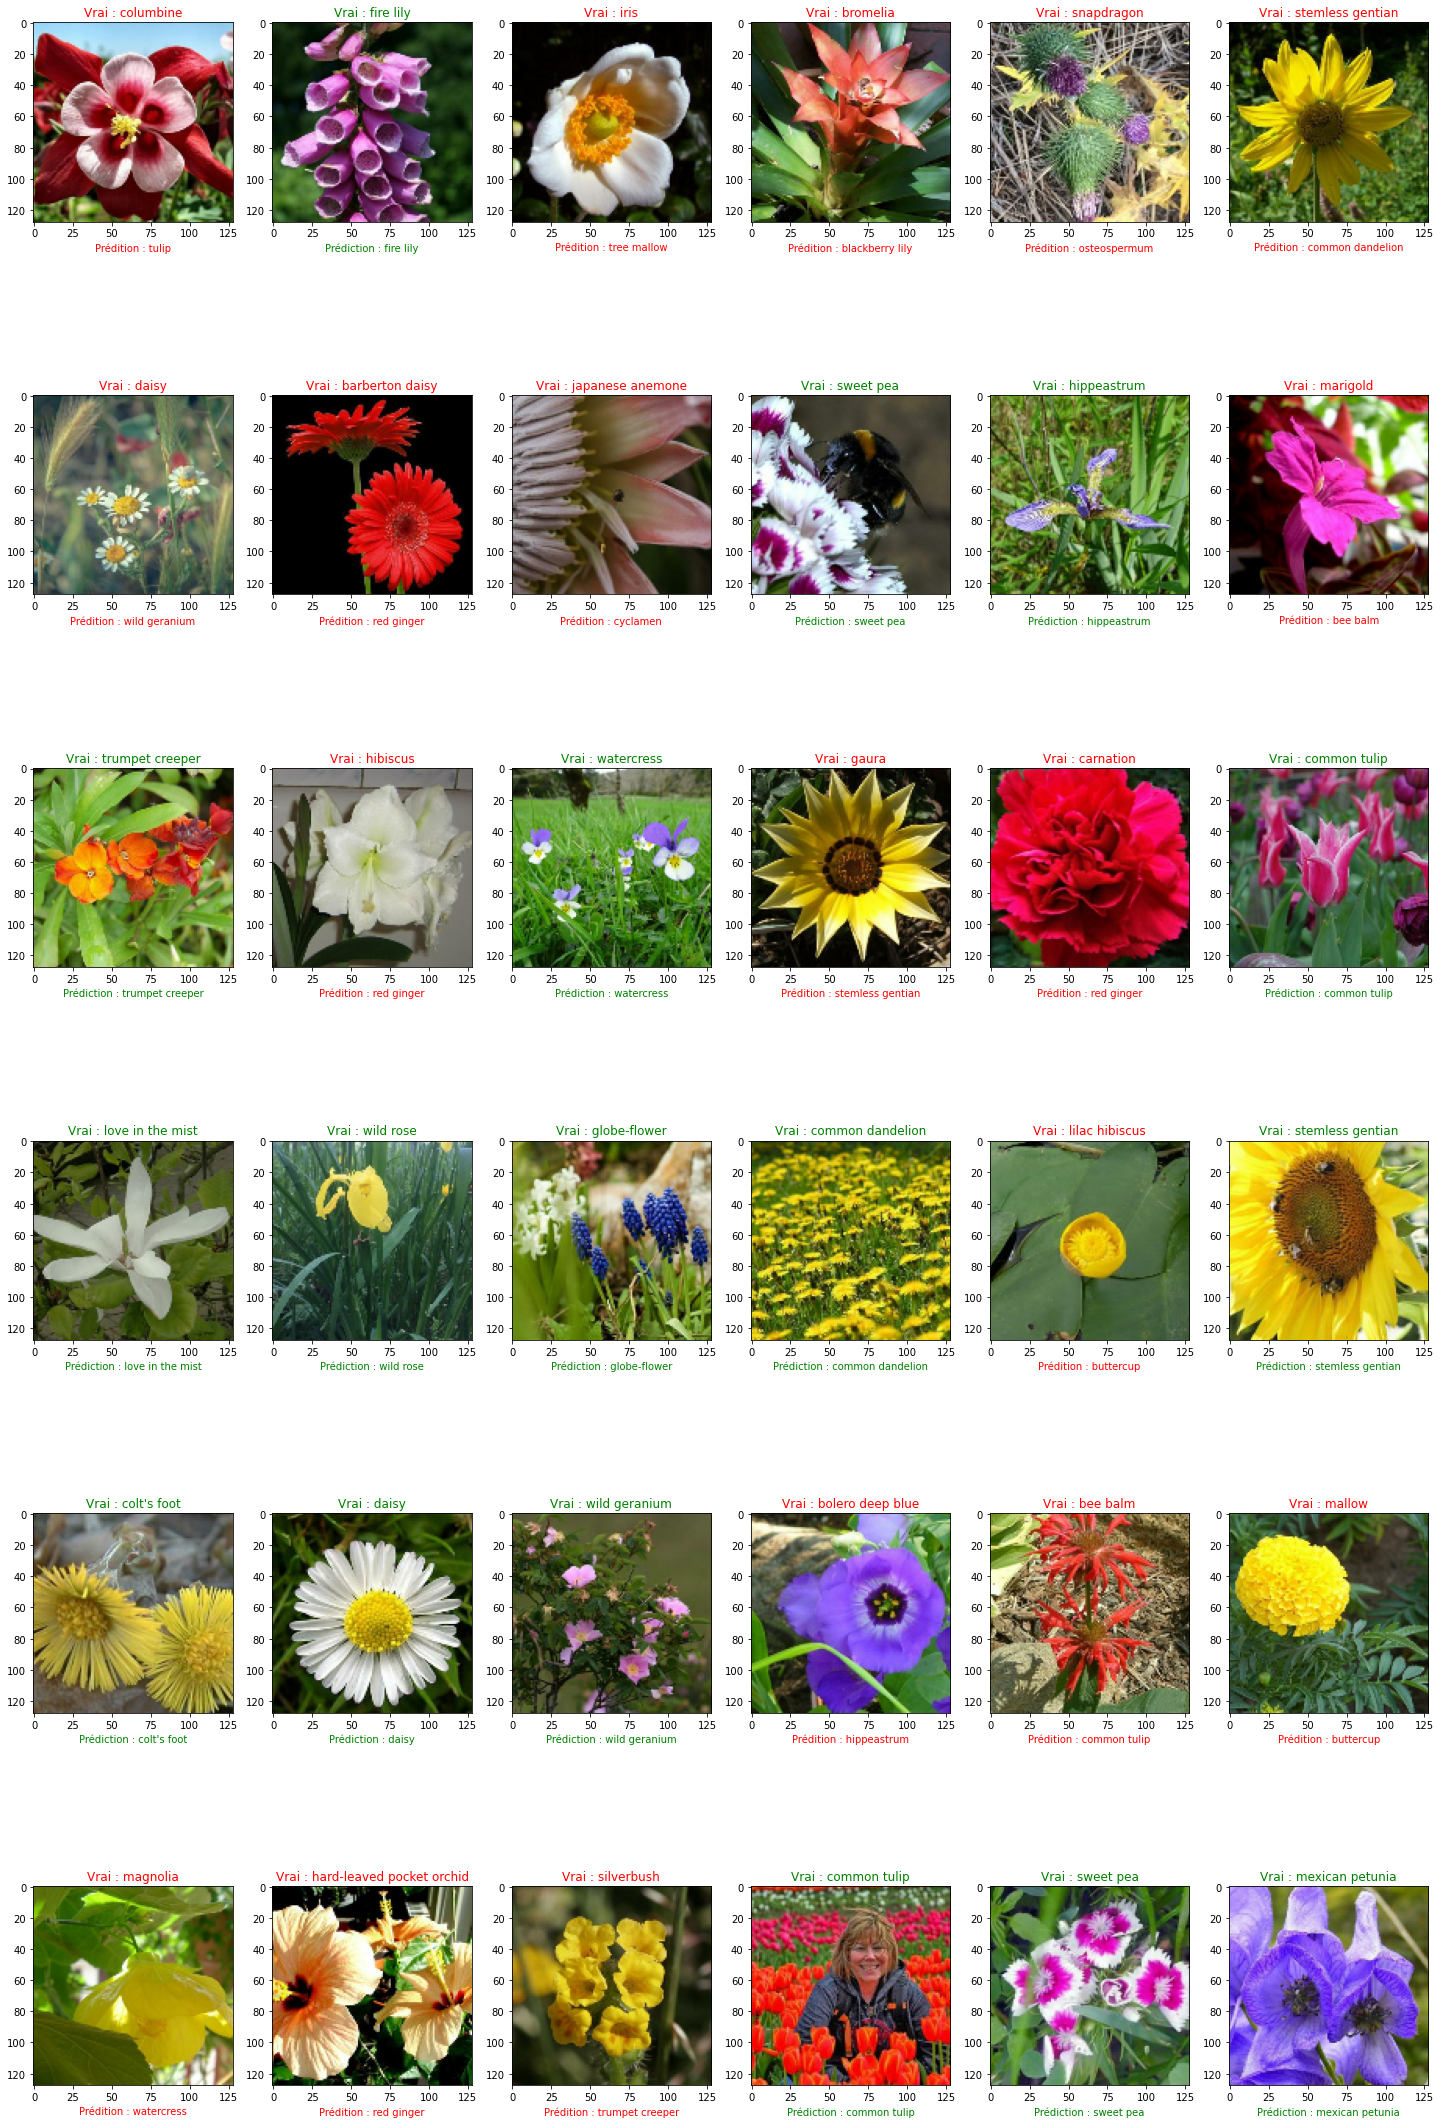

In [15]:
categories = np.sort(os.listdir(FlowerPath))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("Vrai : " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("Prédiction : " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(size, size, 3), cmap='gray')
        else:
            ax[i,j].set_title("Vrai : " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("Prédition : " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(size, size, 3), cmap='gray')